# pythia-level-threshold

In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from utils import utils, stats
from importlib import reload

In [103]:
data_path = '/u/cmolder/GitHub/Pythia/out/pythia_level/exp_spec06mini.csv'
weight_path = '/scratch/cluster/cmolder/traces/prefetcher_zoo/champsim/weights.txt'

# Add SPEC results.
df = utils.read_data_file(data_path)
weights = utils.read_weights_file(weight_path)
weights

,full_trace,weight,trace,simpoint
0,astar_163B,0.452174,astar,163B
1,astar_23B,0.162319,astar,23B
2,astar_313B,0.220290,astar,313B
3,bwaves_1609B,0.262524,bwaves,1609B
4,bwaves_1861B,0.337187,bwaves,1861B
...,...,...,...,...
184,streaming_phase1_core3,0.166667,streaming_core3,phase1
185,streaming_phase2_core3,0.166667,streaming_core3,phase2
186,streaming_phase3_core3,0.166667,streaming_core3,phase3
187,streaming_phase4_core3,0.166666,streaming_core3,phase4


In [108]:
#pd.set_option('display.max_rows', 100)
#df[(df.full_trace == 'astar_313B')]

In [105]:
reload(utils)
reload(stats)
weighted_df = stats.get_weighted_statistics(df, weights) # Weighted by simpoint
#weighted_df[weighted_df.trace == 'astar']

---
## Metrics of each static threshold
- How does each static threshold compare to regular Pythia, and no prefetcher?

In [122]:
def plot_threshold_metric(wdf, trace, metric, dpi=192):
    wdf = wdf[wdf.trace == trace]#[['pythia_level_threshold', metric]])
    wdf = wdf.sort_values(['pythia_level_threshold'])
    #display(wdf)
    X, y = wdf.pythia_level_threshold.to_numpy(), wdf[metric].to_numpy()
    
    fig, ax = plt.subplots(dpi=dpi)
    ax.plot(np.arange(0, len(y)), y, marker='.')
    
    ax.set_xticks(np.arange(0, len(y)))
    ax.set_xticklabels([
        'Double' if row.all_pref == ('no', 'double_pythia', 'no') else
        'Regular' if row.pythia_level_threshold == float('-inf') else 
        str(row.pythia_level_threshold) 
        for _, row in wdf.iterrows()
    ], rotation=45)
                          
    ax.set_xlabel('Static level threshold')
    ax.set_ylabel(metric)
    #ax.set_ylim(ymin=0)
    
    plt.axhline(y=y[1], linewidth=0.75, ls='--', color='red') # Regular Pythia baseline
    plt.axhline(y=y[0], linewidth=0.75, ls='--', color='green') # Double Pythia baseline
    #plt.axhline(y=0, linewidth=0.75, ls='--', color='black') # No prefetcher baseline
    
    fig.suptitle(f'{trace} {metric}')
    fig.tight_layout()

In [120]:
os.makedirs('./plots/pythia_level_threshold/ipc_improvement', exist_ok=True)
os.makedirs('./plots/pythia_level_threshold/L2C_mpki_reduction', exist_ok=True)
os.makedirs('./plots/pythia_level_threshold/LLC_mpki_reduction', exist_ok=True)

## IPC improvement

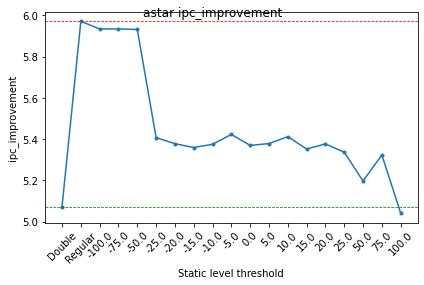

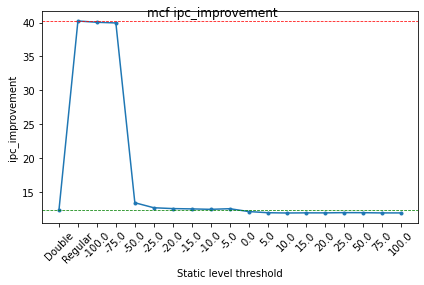

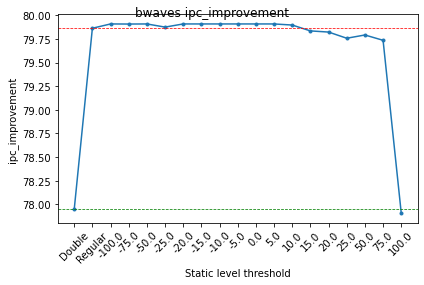

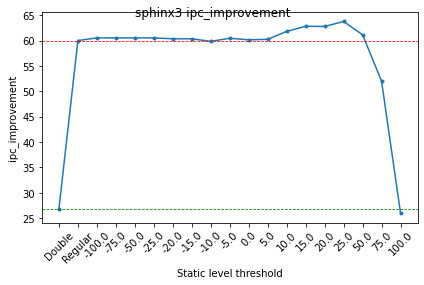

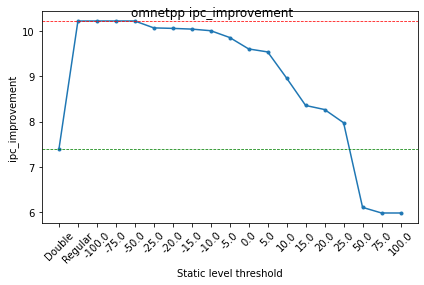

In [123]:
dpi=None

for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'ipc_improvement', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/ipc_improvement/{tr}_ipc_improvement.pdf')

## LLC MPKI reduction

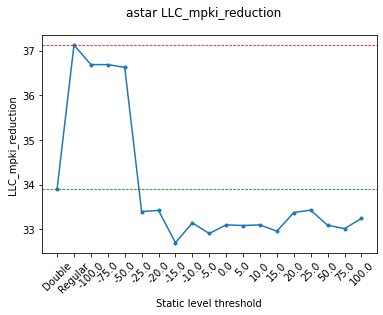

<Figure size 432x288 with 0 Axes>

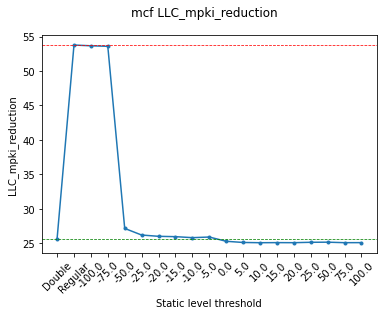

<Figure size 432x288 with 0 Axes>

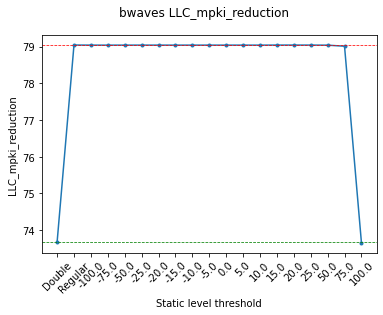

<Figure size 432x288 with 0 Axes>

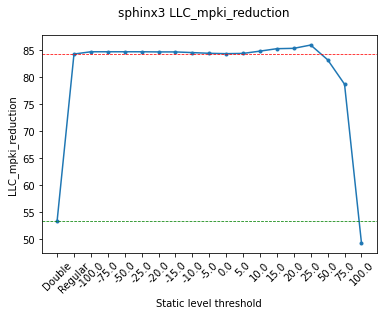

<Figure size 432x288 with 0 Axes>

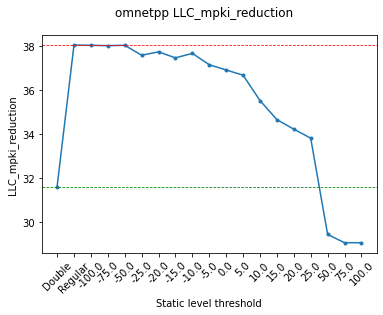

<Figure size 432x288 with 0 Axes>

In [117]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'LLC_mpki_reduction', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/LLC_mpki_reduction/{tr}_LLC_mpki_reduction.pdf')

## L2C MPKI reduction

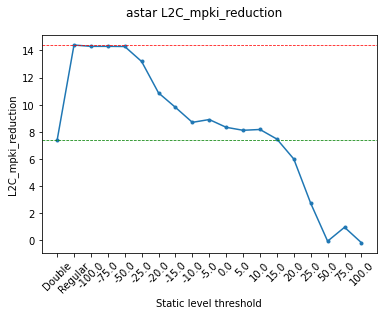

<Figure size 432x288 with 0 Axes>

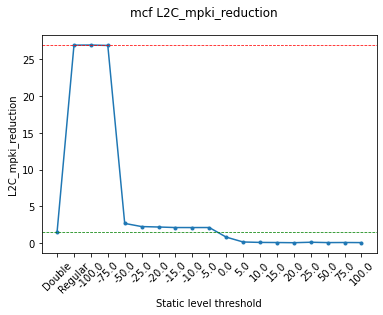

<Figure size 432x288 with 0 Axes>

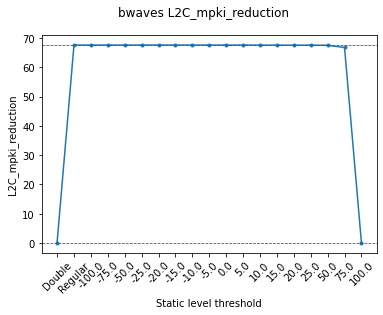

<Figure size 432x288 with 0 Axes>

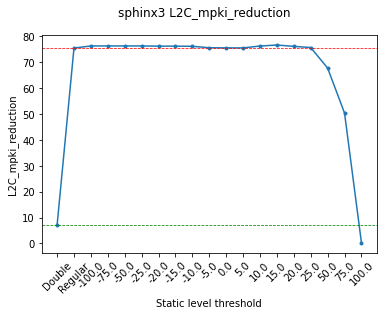

<Figure size 432x288 with 0 Axes>

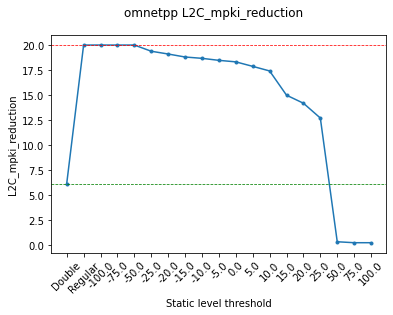

<Figure size 432x288 with 0 Axes>

In [118]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'L2C_mpki_reduction', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/L2C_mpki_reduction/{tr}_L2C_mpki_reduction.pdf')